#  CÁC BƯỚC ĐỂ NHẬN DIỆN KHUÔN MẶT - FACE RECOGNITION

## 1. Phát hiện khuôn mặt trong khung hình bằng thuật toán Haar Cascade

[Tham khảo: Haar Cascades, Explained](https://medium.com/analytics-vidhya/haar-cascades-explained-38210e57970d)

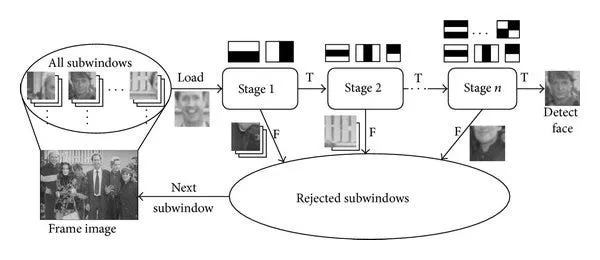


##### Đối với mỗi ảnh đưa vào (input), thuật toán sử dụng kỹ thuật ***Slide Windows***, với nhiều kích thước khác nhau để quét qua toàn bộ ảnh. Trong câu lệnh dưới, tham số  `scaleFactor` là chỉ số quyết định kích thước ảnh thay đổi đối với mỗi lần quét.
- Ví dụ `scaleFactor=1.03` -> tăng/giảm 3% kích thước cửa sổ mỗi lần quét.

In [ ]:
rects = detector.detectMultiScale(gray, scaleFactor=1.03,
	        minNeighbors=21, minSize=(30, 30),   
	        flags=cv2.CASCADE_SCALE_IMAGE)


##### Trong mỗi cửa sổ đó, ta dùng đặc trưng Haar để nhận diện khuôn mặt, với 3 tập đặc trưng như sau:

- Đặc trưng cạnh (Edge feature) <br>
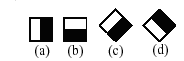

- Đặc trưng đường (Line feature) <br>
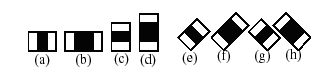

- Đặc trưng quanh tâm (Center-surround feature) <br>
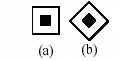

##### Ta tính giá trị của đặc trưng Haar dựa trên sự chênh lệnh giữa tổng pixel của vùng đen và vùng trắng, theo công thức sau: 
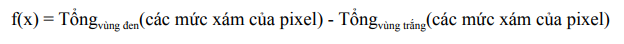

##### Số lượng pixel trong một ảnh rất lớn, nên để tính được giá trị của đặc trưng nhanh hơn, Viola-Joines dùng ***Integral Image*** (Ảnh tích phân - Ảnh chia nhỏ), là một 2D-Array với kích thước bằng với kích thước ảnh gốc. Cách tính minh họa như hình bên dưới:
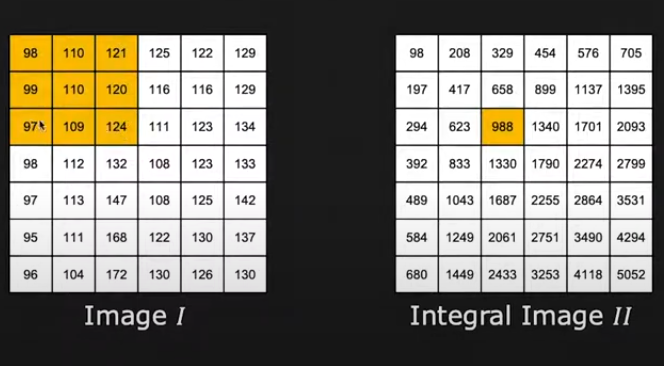
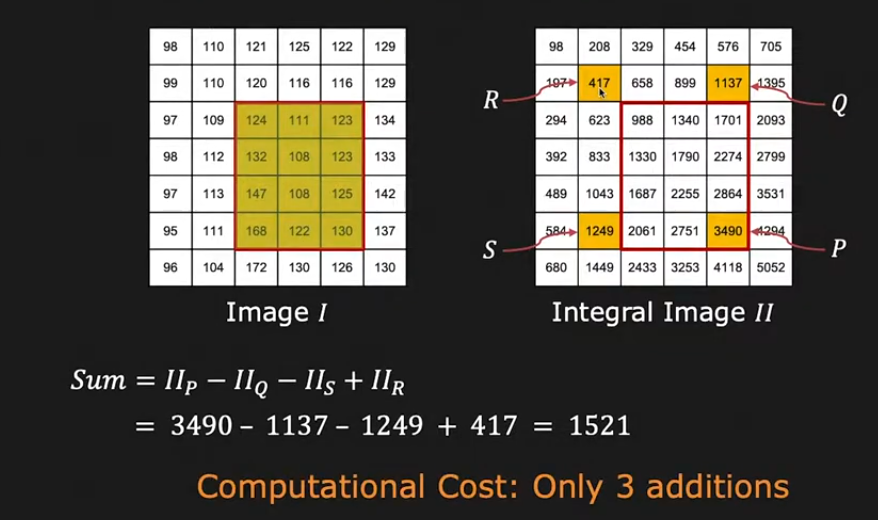
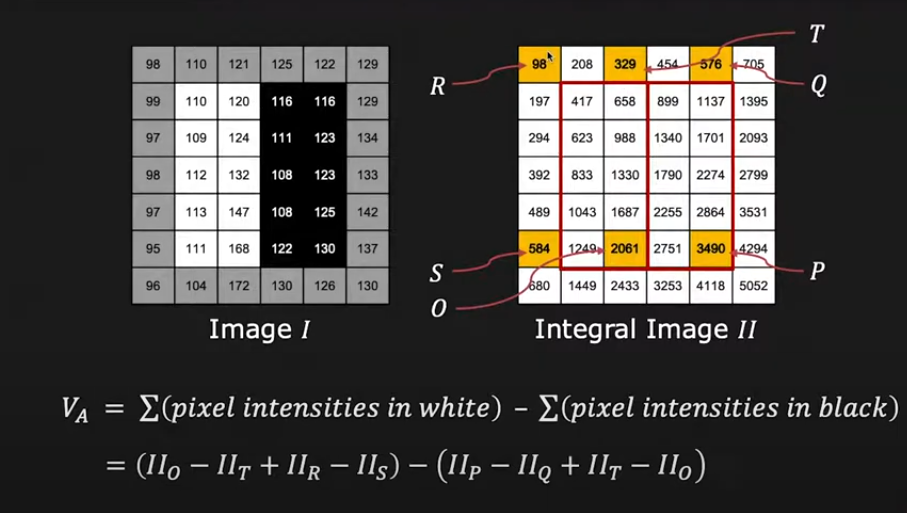

##### Trong một cửa sổ, có rất nhiều những đặc trưng được tính toán và so sánh, nhưng những đặc trưng đó tương đối yếu - "weak classifier", tỉ lệ chính xác thấp trong việc dự đoán có phải khuôn mặt hay không? Do vậy, cần kết hợp các "weak classifier" thành "strong classifier" bằng việc sử dụng kỹ thuật học máy ***AdaBoost (adaptive boosting)***

- Boosting: kết hợp các "weak classifier" tạo thành một "strong classifier":

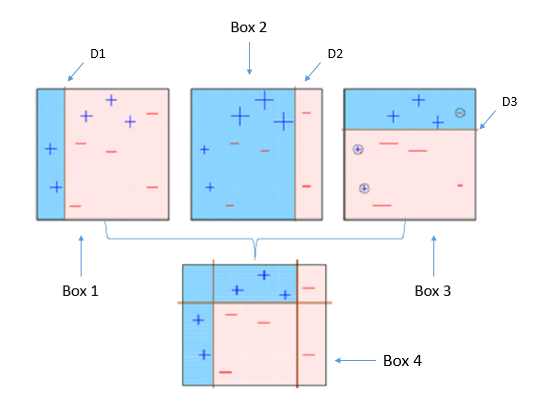

- Adaptive: đặc *trọng số - weight* cho các "weak classifier" tốt hơn, lặp lại liên tục để tạo thành một chuỗi cascade - một "strong classifier" với độ chính xác cao:

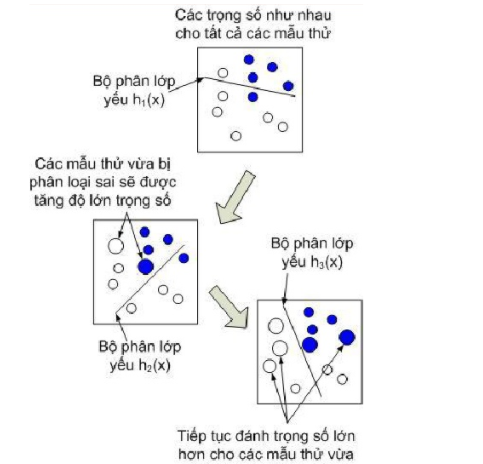      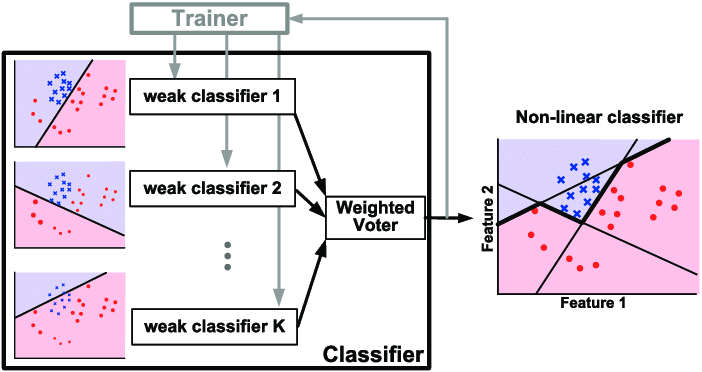

##### Qua AdaBoost, chúng ta đã có những đặc trưng tương đối mạnh. Tuy nhiên, để đưa ra quyết định rằng cửa sổ này là khuôn mặt thì ta cần hàng ngàn (6000+) đặc trưng như thế; vì vậy, ta cần dùng Cascade để phân loại một cách nhanh chóng.

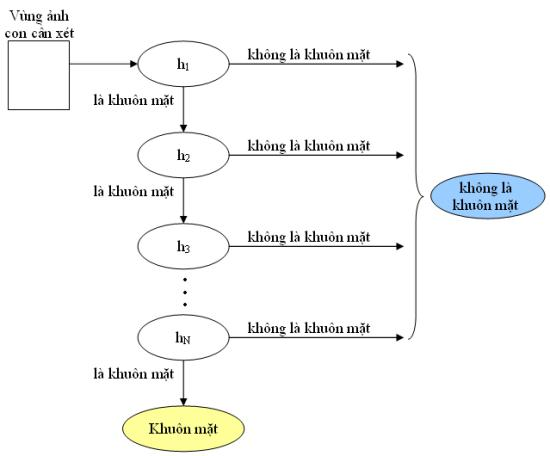

##### Cascade - Phân tầng: mỗi lần trượt cửa sổ, thực hiện thứ tự từng bước: nếu bước 1 quyết định là mặt -> chuyển sang bước 2, rồi đến bước tiếp theo...; nếu không thì bỏ quả và trượt tiếp cửa sổ. Một cửa sổ được quyết định là chứa mặt người thì phải pass qua toàn bộ các tầng này.

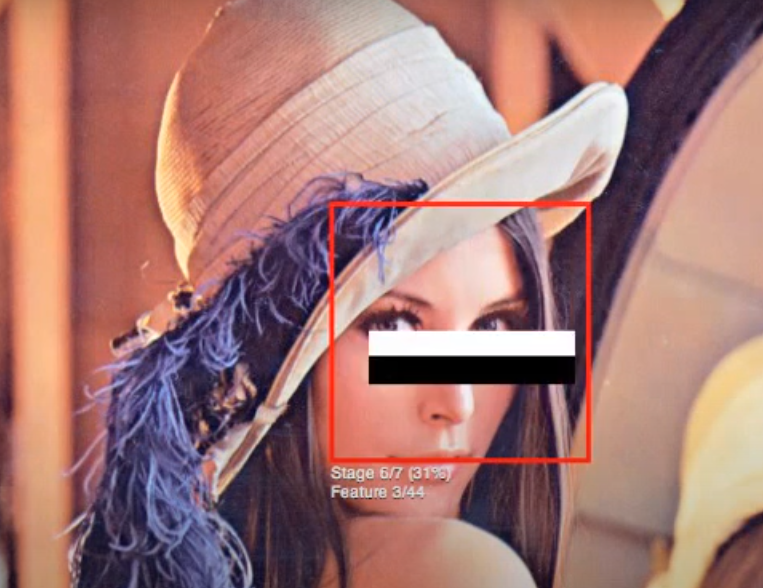      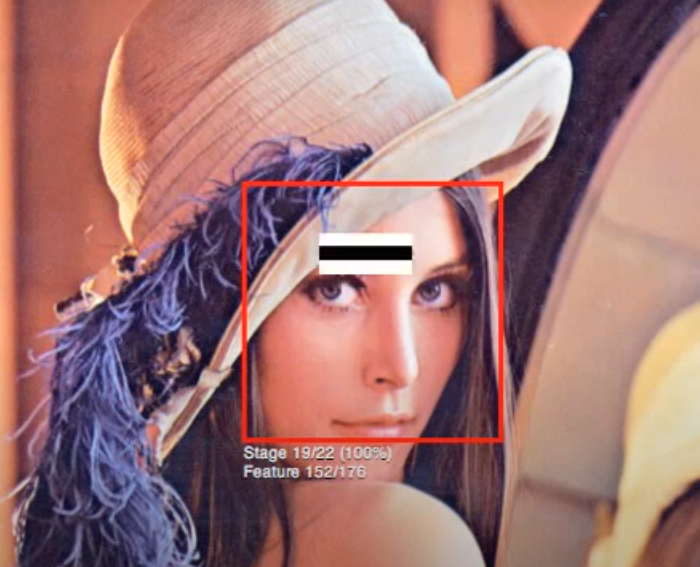

## 2. Trích xuất đặc trưng của khuôn mặt đã phát hiện
- Tham khảo ConvNet <br>
[Tham khảo 1](https://viblo.asia/p/deep-learning-tim-hieu-ve-mang-tich-chap-cnn-maGK73bOKj2) <br>
[Tham khảo 2](https://www.datawow.io/blogs/interns-explain-cnn-8a669d053f8b) <br>
[Tham khảo 3](https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/) <br>
[Tham khảo 4](https://adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks/) <br>
[Tham khảo 5](https://www.youtube.com/watch?v=KuXjwB4LzSA)<br>

- Tham khảo Triplet lost: `Grok`

`2 ẢNH KHUÔN MẶT GẦN NHAU THÌ 2 VECTOR TƯƠNG ỨNG CŨNG CÓ KHOẢNG CÁCH GẦN NHAU
2 ẢNH KHUÔN MẶT KHÁC NHAU THÌ 2 VECTOR TƯƠNG ỨNG PHẢI CÓ KHOẢNG CÁCH XA NHAU`

##### Sau khi đã phát hiện khuôn mặt, cắt khuôn mặt trong ảnh gốc, ta cần phải trích xuất đặc trưng của từng khuôn mặt đó để có thể nhận dạng nó - là của ai - sau này. 

##### Để xác định được khuôn mặt của ai, ta cần so sánh sự ***GIỐNG/KHÁC*** nhau giữa các khuôn mặt. Nếu so sánh các bức ảnh thuần, rất phức tạp và không hiệu quả; nên ta sẽ chuyển đặc trưng đó sang ***vector***. Đối với vector, quy về bài toán ***tính khoảng cách giữa các vector***

### 2.0 ***ConvNet*** và hàm ***Loss Triplet*** để chuyển ảnh khuôn mặt sang vector 128 chiều

***Nhận xét***: không dùng Artificial Neural Network - Mạng nơ-ron nhân tạo(a network to classify image) vì:
- *Cần sức mạnh CPU quá lớn*: một image(256x256) đưa vào làm input được hiểu là matrix 3 lớp (RGB). 

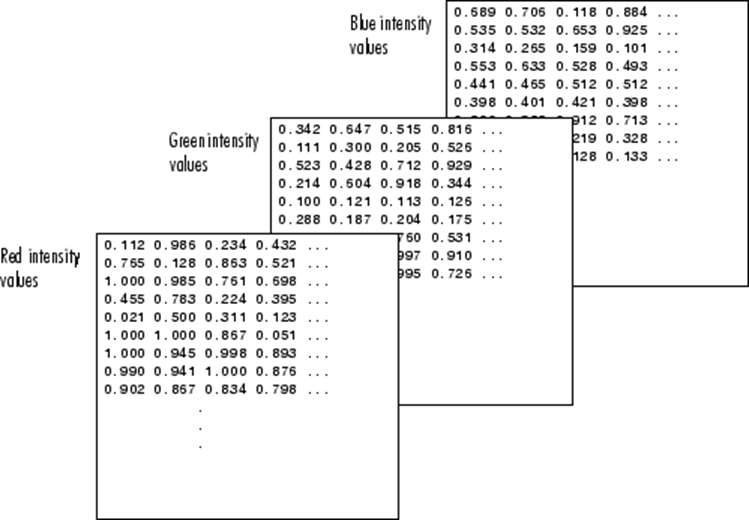

Neural Network trải phẳng (flatten) thành một vector input, với ảnh ban đầu, ta có 256 x 256 x 3 = 196,608 input values; khi ta dùng 1,000 lớp ẩn thì hơn 196 triệu tham số !!!

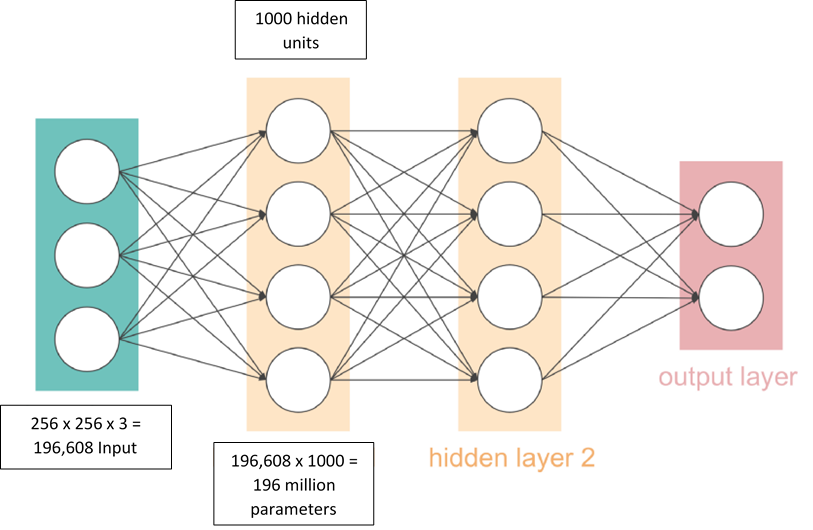

- *Mất đặc điểm cục bộ*: khi nhận diện khuôn mặt, ta cần lưu lại các đặc điểm cục bộ chính như mắt, mũi, miệng, nhưng khi trải phẳng matrix, cách Neural Network làm thì sẽ mất hết các đặc điểm này.

#### (1)***ConvNet (Convolutional Neural Network)*** :
Mạng nơ-ron tích chập thường dùng để xử lí dữ liệu dạng có cấu trúc lưới như hình ảnh 2D, 3D,... Bởi có các ưu điểm:
- Tận dụng các convolutional layers(lớp tích chập) để trích xuất nhanh các đặc trưng như cạnh, góc hay họa tiết. Thuận tiện cho trích xuất đặc trưng mắt, mũi, miệng ở mặt

- Học phân cấp các features(đặc trưng): các lớp đầu tiên học low-features như đường nét cong, thẳng,... , các lớp sâu hơn học high-features như mắt, mũi, miệng. Chính xác hơn so với HOG

- Tính bất biến với dịch chuyển: nhận diện các face bất kể vị trí nào trong ảnh, khung hình

- Giảm số lượng tham số: nhờ filters - kernel(bộ lọc) chia sẻ weight(trọng số), nên làm giảm số lượng tham số cần huấn luyện => tăng hiệu quả.

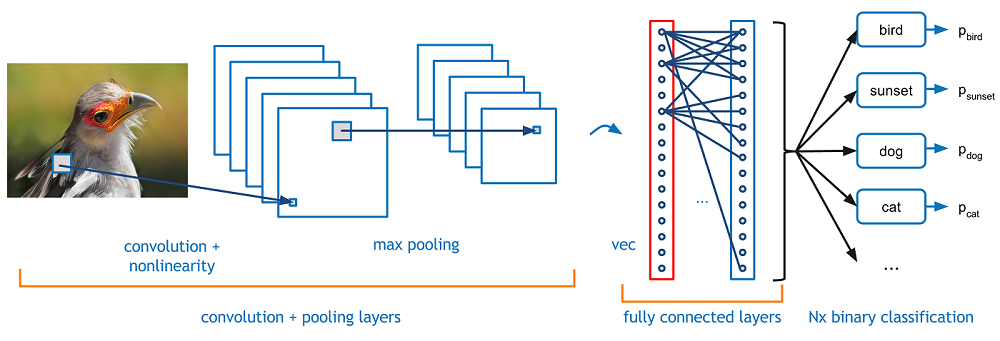

- Dùng cấu trúc 3 nhánh, cho ra(với mỗi image đầu vào) là một vector đầu ra 128 chiều.

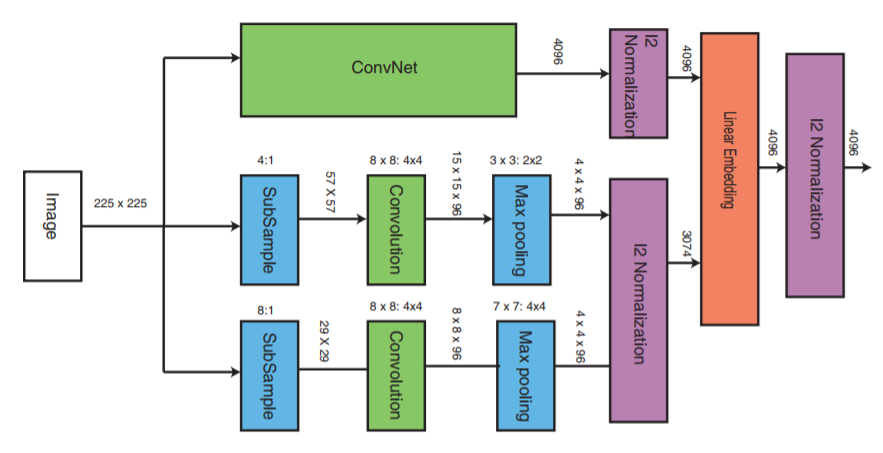

##### ***Convolution - Tích chập***:

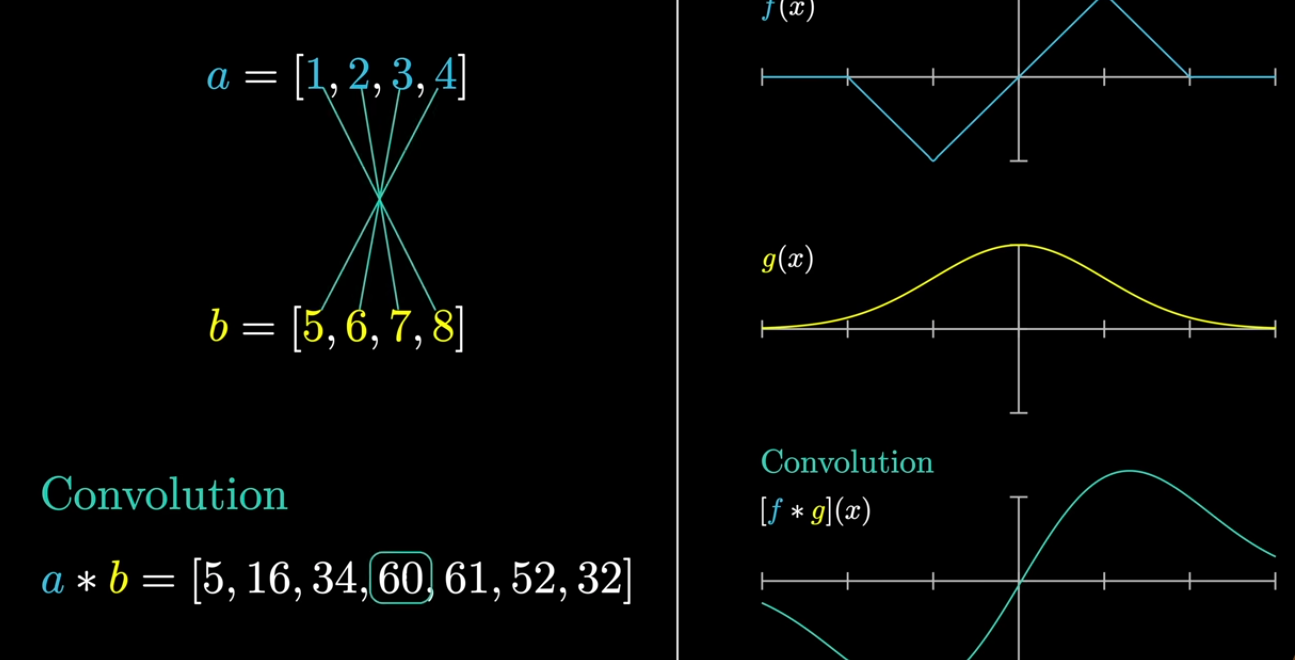

Convolution sử dụng 2 input đầu vào: 
1. Image matrix với size: H(eight) x W(idth) x D(epth)
2. Một filter(kernel) - F(h) x F(w) x D
Và cho ra output với size: ***(H - F(h) + 1) x (W - F(w) + 1) x 1 ***
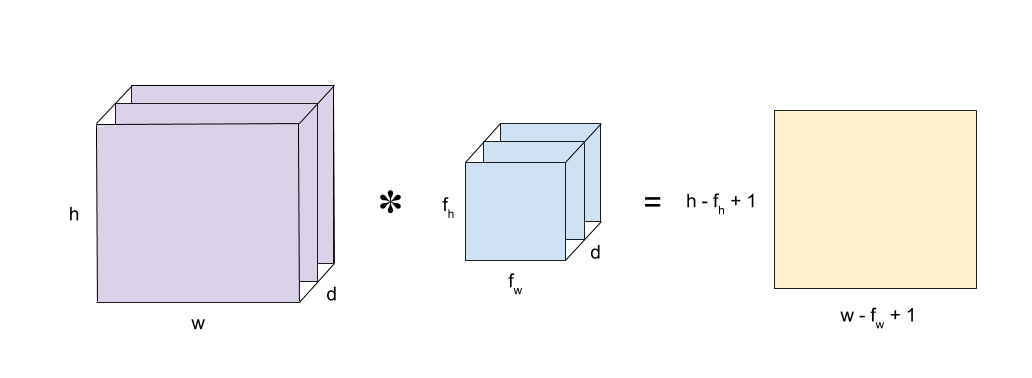

Đơn giản với D = 1, H = W = n và F(h) = F(w) = f, nghĩa là image matrix và filter là ảnh thang độ xám. 
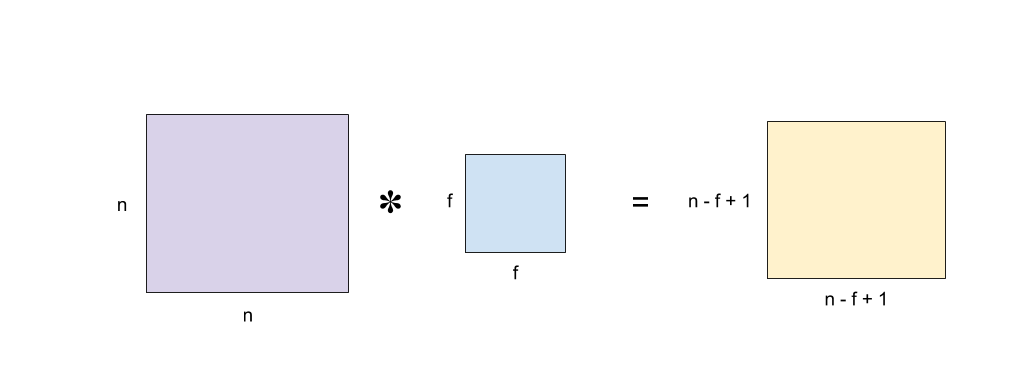

Ví dụ minh hoạ: 

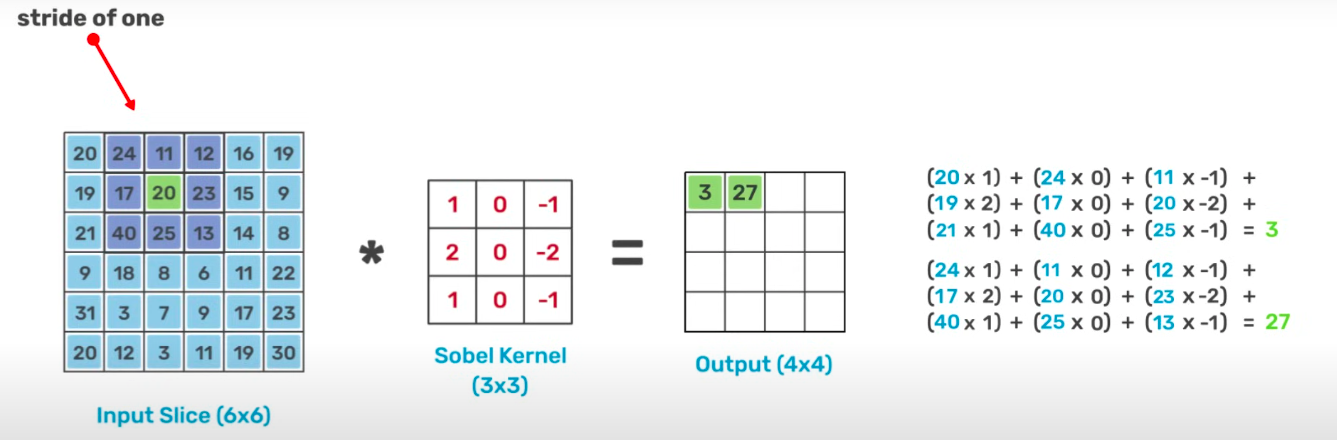
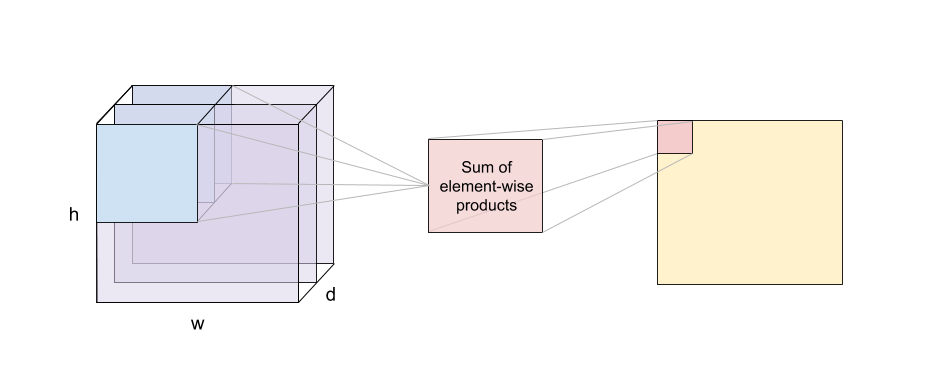
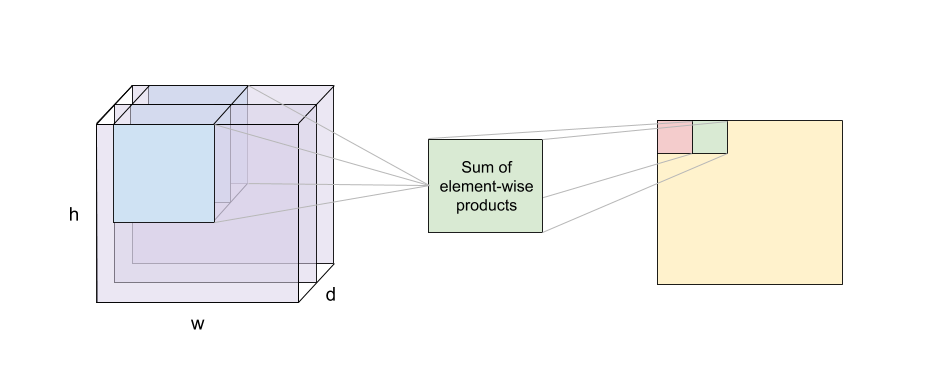


##### ***Convolution Layer - Lớp tích chập***:
Một lớp tích chập gồm *n* filters cùng size & depth, ta được: 
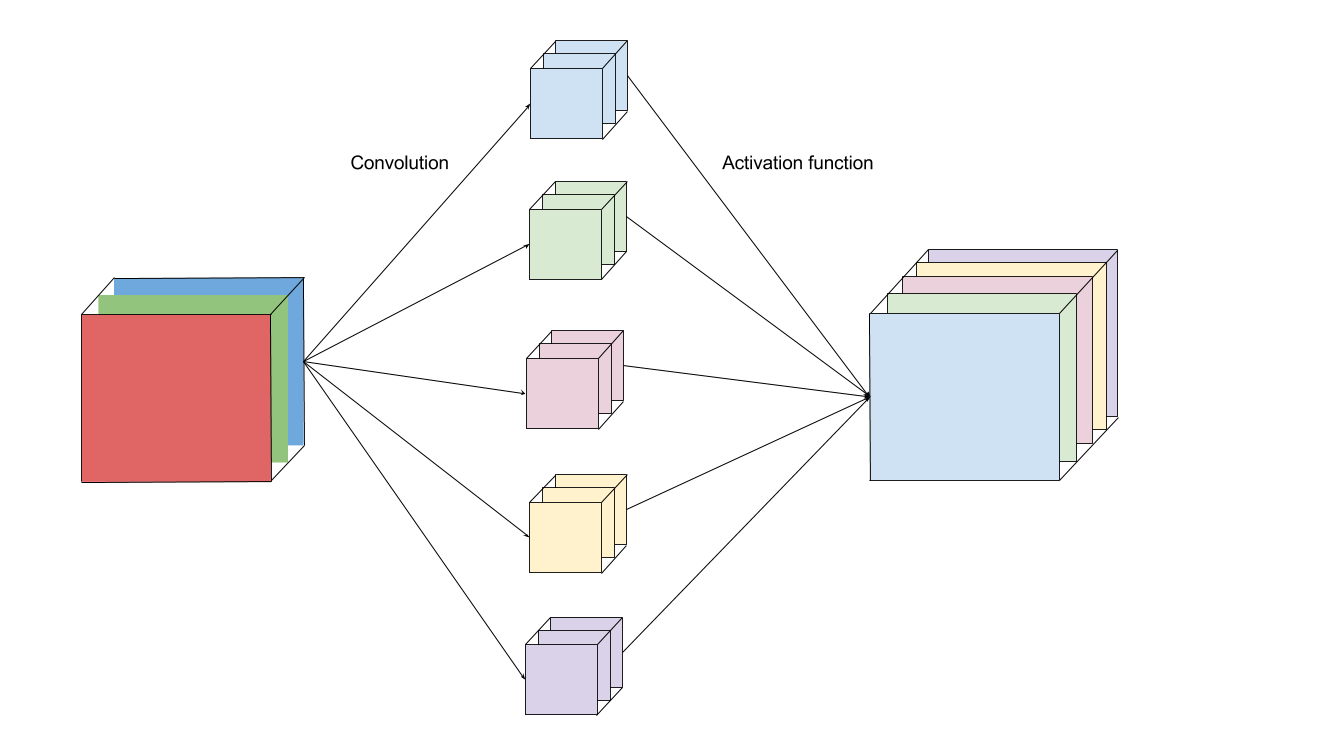

##### ***Padding***: 
Khi filter không phù hợp với hình image đầu vào và khi tích chập, kích thước của image giảm dễn đến khi qua nhiều lớp tích chập, kích thước image bị co lại => quá nhỏ. 
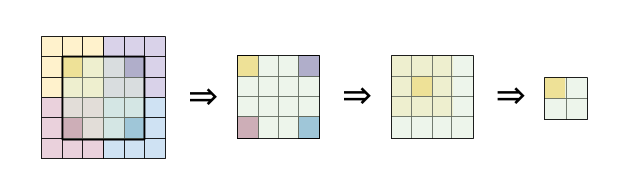

- Giải pháp: sử dụng ***same-padding***, áp dụng zero-padding cho image sao cho input có cùng H và W với output. 

##### ***Pooling Layer - Lớp gộp***: 
Để giảm kích thước dữ liệu sau mỗi lớp tích chập mà vẫn bảo toàn thông tin của hình ảnh với hình ảnh nhỏ hơn, ta dùng ***pooling***
- Max pooling*
- Average pooling

Thường sử dụng *max pooling* để cho ra kết quả tốt hơn:
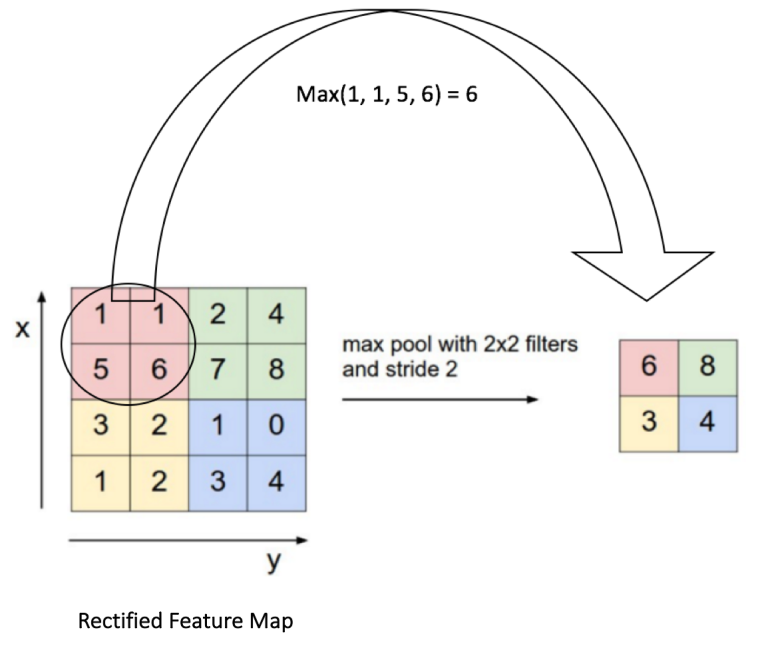


##### ***ReLU(Rectified Feature Map) - Hàm phi tuyến***:
Vì hầu hết dữ liệu thực tế mà ta áp dụng ConvNet sẽ không tuyến tính - phi tuyến, nhưng convolution là một phép toán tuyến tính: phép nhân và cộng matrix. 
Do vậy, để đưa tính phi tuyến vào ConvNet, ta dùng ReLU: thay thế các giá trị pixel âm trong features map bằng 0.

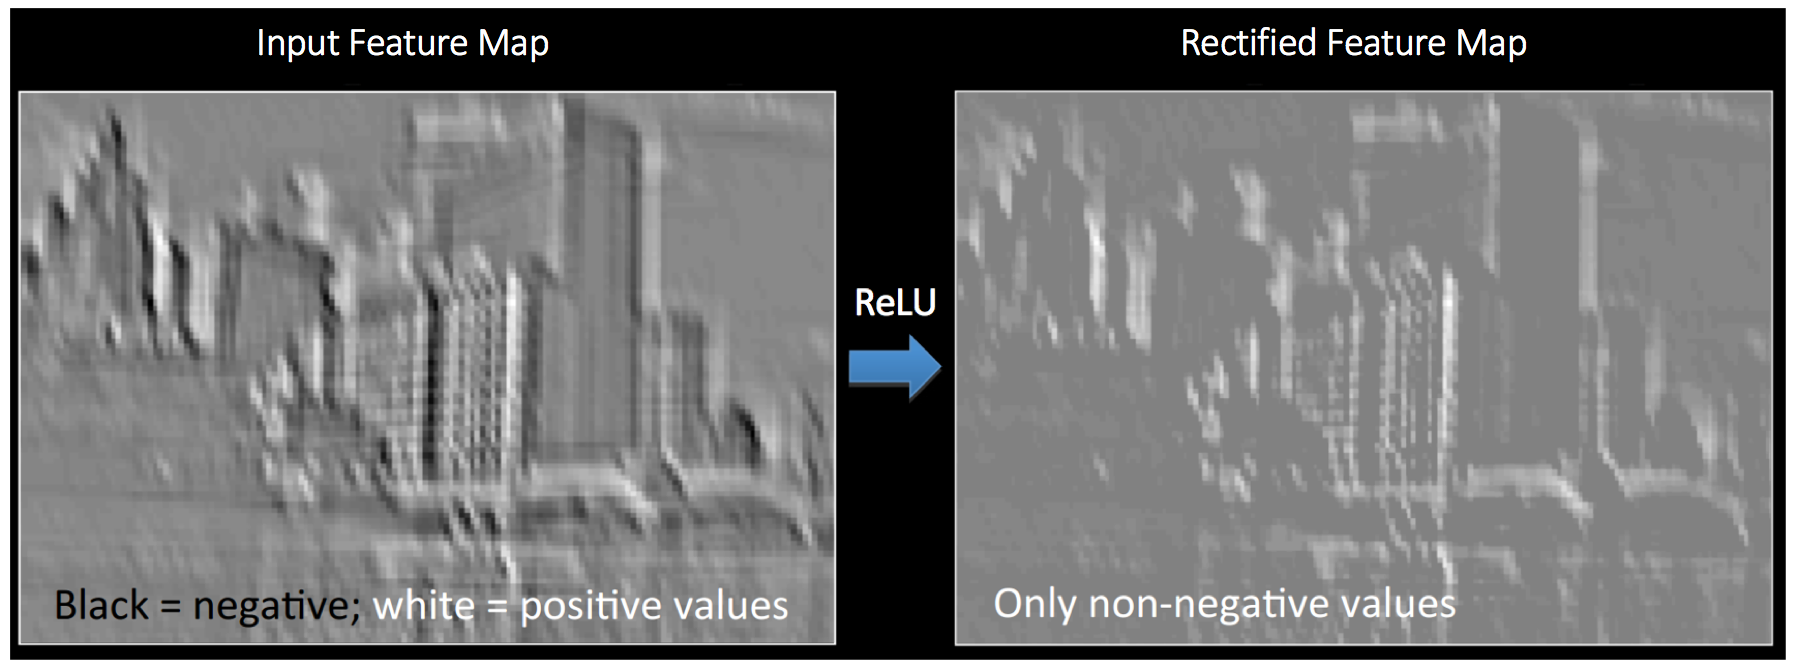

##### ***Fully Connected - Lớp kết nối đầy đủ***:
Sử dụng hàm kích hoạt ***softmax*** để phân loại bằng việc kết hợp mọi nơ-ron ở lớp trước và mọi nơ-ron ở lớp tiếp theo. 
- Cuối cùng ta được một ConvNet đơn giản như sau:

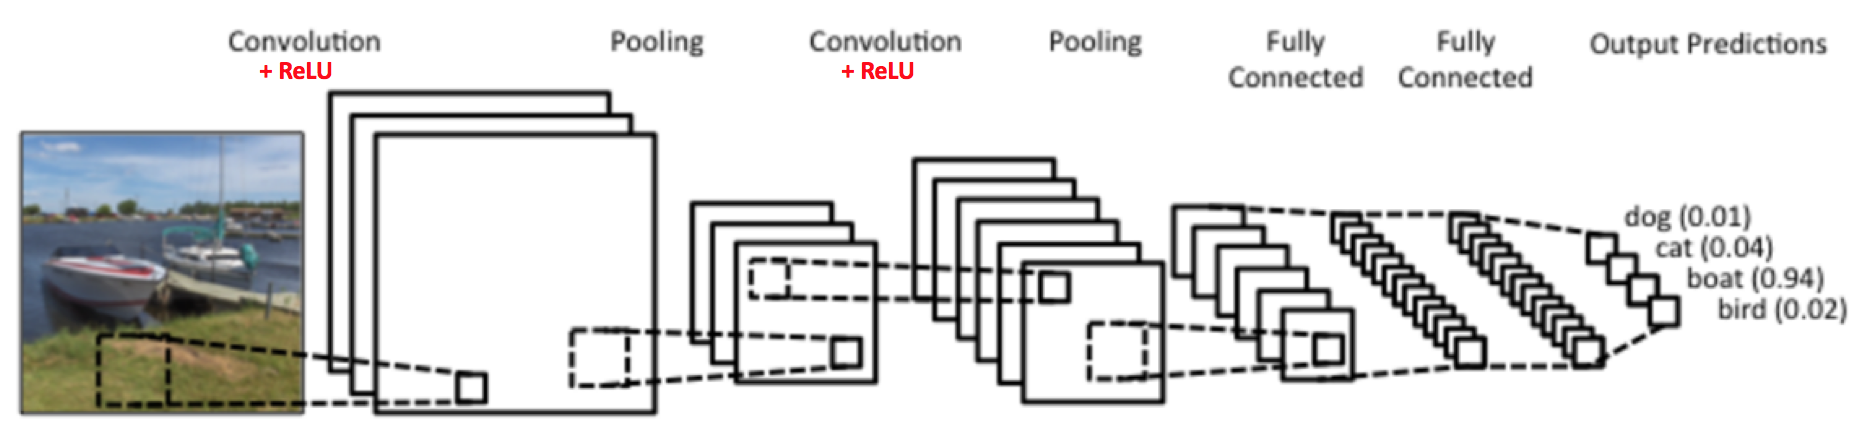

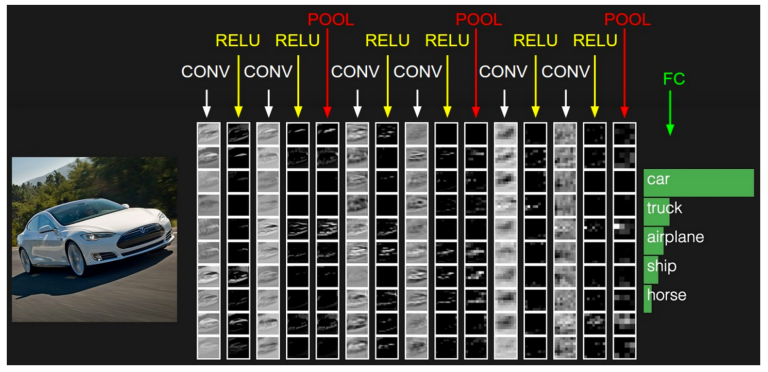

#### (2)***Triplet*** - sử dụng ***bộ ba*** gồm: 
 - 1 ảnh mặt của một người bất kì (người A, chẳng hạn), 
 - 1 ảnh mặt khác của người A (positive),
 - 1 ảnh mặt của người khác (negative)

#### (3) ***Hàm Triplet Loss - Hàm mất mát***:
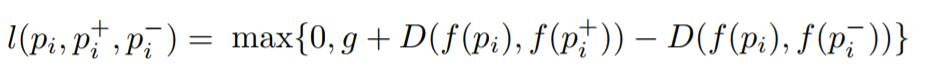

***Trong đó:***
 - *g* : hằng số dương, đại diện cho khoảng cách tối thiểu giữa
 *D(f(pi), f(pi+))* và *D(f(pi), f(pi-))*. <br>
 <b>Mục đích</b>: đảm bảo khoảng cách giữa các mẫu cùng lớp và khác lớp không chỉ khác nhau mà còn khác nhau rõ rệt(ít nhất là *g*)

 - *pi* : mẫu ảnh để tham chiếu trong tập dữ liệu (là ảnh của 1 người cần trích xuất).
 - *pi+* : mẫu positive, là ảnh khác của người pi - cùng nhãn.
 - *pi-* : mẫu negative, là ảnh của người khác pi - khác nhãn.

 - *f(p)* : vector biểu diễn p.

 - *D* : khoảng cách giữa 2 vector, dùng hàm Euclidean để tính:

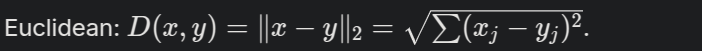

***Mục tiêu:*** nhắm tới là khoảng cách D càng lớn càng tốt, nghĩa là 2 khuôn mặt khác nhau phải có khoảng cách *càng xa càng tốt*:
 - Giảm khoảng cách giữa 2 vector cùng 1 người: *D(f(pi), f(pi+))*

 - Tăng khoảng cách giữa 2 vector khác người: *D(f(pi), f(pi-))*

***Ví dụ:***

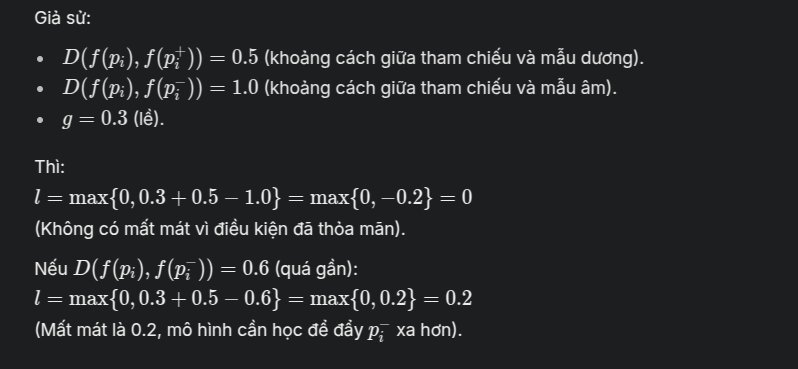

## 2.1 Xây dựng và huấn luyện mô hình

### Chuẩn bị dữ liệu: [Tensorflow Dataset](https://ndownloader.figshare.com/files/5976018)

### Xây dựng mô hình:

##### (1) ConvNet và Model: 1 ảnh đưa vào 3 đường khác nhau, tạo thành một vector 128 chiều đặc trưng cho ảnh khuôn mặt đó.

In [ ]:
# Imports
import os
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import applications, Model, Input
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Lambda, GlobalAveragePooling2D, concatenate
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow.keras.backend as K

In [ ]:
# Tạo list chứa đường dẫn ảnh và nhãn
image_paths = []
labels = []

def get_image_paths_and_labels(data_dir, people_df):
    print("Bắt đầu lấy danh sách hình ảnh và nhãn...")
    start_time = time.time()
    image_paths.clear()
    labels.clear()

    # Sử dụng tqdm để hiển thị thanh tiến trình
    for _, row in tqdm(people_df.iterrows(), total=len(people_df), desc="Xử lý các nhãn"):
        person_name = row['name']
        person_dir = os.path.join(data_dir, person_name)

        if os.path.isdir(person_dir):
            image_files = [f for f in os.listdir(person_dir) if f.endswith('.jpg')]
            for image_name in image_files:
                image_paths.append(os.path.join(person_dir, image_name))
                labels.append(person_name)

    print(f"Hoàn thành lấy danh sách hình ảnh và nhãn. Thời gian: {time.time() - start_time:.2f} giây")
    print(f"Unique labels: {len(set(labels))}")

def preprocess_image(image_path, target_size=(221, 221)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    return img_array

# Lọc các nhãn có ít nhất 2 hình ảnh
def filter_labels_with_min_images(image_paths, labels, min_images=2):
    print("Bắt đầu lọc các nhãn có ít nhất 2 hình ảnh...")
    start_time = time.time()

    label_counts = Counter(labels)
    # In phân bố số lượng hình ảnh trên mỗi nhãn
    print("Phân bố số lượng hình ảnh trên mỗi nhãn:")
    for count in range(1, max(label_counts.values(), default=0) + 1):
        num_labels = sum(1 for _, c in label_counts.items() if c == count)
        print(f"Số nhãn có {count} hình ảnh: {num_labels}")

    valid_labels = [label for label, count in label_counts.items() if count >= min_images]
    filtered_indices = [i for i, label in enumerate(labels) if label in valid_labels]
    filtered_image_paths = [image_paths[i] for i in filtered_indices]
    filtered_labels = [labels[i] for i in filtered_indices]

    print(f"Hoàn thành lọc nhãn. Thời gian: {time.time() - start_time:.2f} giây")
    print(f"Number of filtered images: {len(filtered_image_paths)}")
    print(f"Number of filtered unique labels: {len(set(filtered_labels))}")
    return filtered_image_paths, filtered_labels

# Tạo triplets ngẫu nhiên
def create_triplets(image_paths, labels, num_triplets=1000):
    print("Bắt đầu tạo triplets ngẫu nhiên...")
    triplets = []
    label_set = list(set(labels))

    start_time = time.time()
    for i in tqdm(range(num_triplets), desc="Tạo triplets"):
        anchor_idx = random.randint(0, len(image_paths) - 1)
        anchor_label = labels[anchor_idx]
        positive_candidates = [i for i, label in enumerate(labels) if label == anchor_label and i != anchor_idx]
        if len(positive_candidates) == 0:
            continue
        positive_idx = random.choice(positive_candidates)
        negative_label = random.choice([lbl for lbl in label_set if lbl != anchor_label])
        negative_candidates = [i for i, label in enumerate(labels) if label == negative_label]
        negative_idx = random.choice(negative_candidates)
        triplets.append((image_paths[anchor_idx], image_paths[positive_idx], image_paths[negative_idx]))

    print(f"Hoàn thành tạo triplets. Thời gian: {time.time() - start_time:.2f} giây")
    return triplets

# Tải và tiền xử lý triplets
def load_triplet_data(triplets):
    print("Bắt đầu tải và tiền xử lý triplets...")
    anchor_images = []
    positive_images = []
    negative_images = []

    start_time = time.time()
    for i, (anchor_path, positive_path, negative_path) in enumerate(tqdm(triplets, desc="Tiền xử lý triplets")):
        anchor_images.append(preprocess_image(anchor_path))
        positive_images.append(preprocess_image(positive_path))
        negative_images.append(preprocess_image(negative_path))

    print(f"Hoàn thành tải và tiền xử lý triplets. Thời gian: {time.time() - start_time:.2f} giây")
    return (np.array(anchor_images), np.array(positive_images), np.array(negative_images))

# Chạy pipeline
# 1. Lấy danh sách hình ảnh và nhãn
get_image_paths_and_labels(data_dir, people_df)
print(f"Number of images: {len(image_paths)}")
print(f"Number of labels: {len(labels)}")

# Kiểm tra xem có hình ảnh nào được lấy hay không
if len(image_paths) == 0:
    raise ValueError("Không tìm thấy hình ảnh nào. Vui lòng kiểm tra lại đường dẫn data_dir hoặc cấu trúc thư mục.")

# 2. Lọc các nhãn có ít nhất 2 hình ảnh
filtered_image_paths, filtered_labels = filter_labels_with_min_images(image_paths, labels, min_images=2)

# Kiểm tra xem có dữ liệu sau khi lọc hay không
if len(filtered_image_paths) == 0:
    raise ValueError("Không có nhãn nào với ít nhất 2 hình ảnh. Vui lòng kiểm tra dataset hoặc điều chỉnh min_images.")

# 3. Tạo triplets ngẫu nhiên
triplets = create_triplets(filtered_image_paths, filtered_labels, num_triplets=1000)
print(f"Số triplets: {len(triplets)}")

# 4. Tải và tiền xử lý triplets
anchor_images, positive_images, negative_images = load_triplet_data(triplets)
print(f"Anchor images shape: {anchor_images.shape}")
print(f"Positive images shape: {positive_images.shape}")
print(f"Negative images shape: {negative_images.shape}")

# Lưu dữ liệu đã tiền xử lý để sử dụng sau
print("Lưu dữ liệu đã tiền xử lý vào file numpy...")
start_time = time.time()
np.save('/content/anchor_images.npy', anchor_images)
np.save('/content/positive_images.npy', positive_images)
np.save('/content/negative_images.npy', negative_images)
print(f"Hoàn thành lưu dữ liệu. Thời gian: {time.time() - start_time:.2f} giây")


In [ ]:

##### CREATE AND TRAIN MODEL #####

# Giải phóng bộ nhớ trước khi tạo mô hình
tf.keras.backend.clear_session()

# Định nghĩa hàm l2_normalize
def l2_normalize(x, axis=1):
    return K.l2_normalize(x, axis=1)

# Định nghĩa mô hình con
def convnet_model_():
    vgg_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    x = vgg_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.6)(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.6)(x)
    x = Lambda(l2_normalize, output_shape=(1024,))(x)  # Thêm output_shape
    convnet_model = Model(inputs=vgg_model.input, outputs=x)
    return convnet_model

# Định nghĩa mô hình chính
def deep_rank_model():
    convnet_model = convnet_model_()

    anchor_input = Input(shape=(128, 128, 3), name='anchor_input')
    positive_input = Input(shape=(128, 128, 3), name='positive_input')
    negative_input = Input(shape=(128, 128, 3), name='negative_input')

    # Tính nhúng cho anchor
    first_conv_anchor = Conv2D(64, kernel_size=(8,8), strides=(16,16), padding='same')(anchor_input)
    first_max_anchor = MaxPool2D(pool_size=(3,3), strides=(2,2), padding='same')(first_conv_anchor)
    first_max_anchor = Flatten()(first_max_anchor)
    first_max_anchor = Lambda(l2_normalize, output_shape=(1024,))(first_max_anchor)  # 1024 từ Flatten

    second_conv_anchor = Conv2D(64, kernel_size=(8,8), strides=(32,32), padding='same')(anchor_input)
    second_max_anchor = MaxPool2D(pool_size=(7,7), strides=(4,4), padding='same')(second_conv_anchor)
    second_max_anchor = Flatten()(second_max_anchor)
    second_max_anchor = Lambda(l2_normalize, output_shape=(64,))(second_max_anchor)  # 64 từ Flatten

    merge_one_anchor = concatenate([first_max_anchor, second_max_anchor])  # (1024 + 64) = 1088
    merge_two_anchor = concatenate([merge_one_anchor, convnet_model(anchor_input)])  # (1088 + 1024) = 2112
    emb_anchor = Dense(1024)(merge_two_anchor)
    emb_anchor = Dense(128)(emb_anchor)
    anchor_output = Lambda(l2_normalize, output_shape=(128,))(emb_anchor)

    # Tính nhúng cho positive
    first_conv_positive = Conv2D(64, kernel_size=(8,8), strides=(16,16), padding='same')(positive_input)
    first_max_positive = MaxPool2D(pool_size=(3,3), strides=(2,2), padding='same')(first_conv_positive)
    first_max_positive = Flatten()(first_max_positive)
    first_max_positive = Lambda(l2_normalize, output_shape=(1024,))(first_max_positive)

    second_conv_positive = Conv2D(64, kernel_size=(8,8), strides=(32,32), padding='same')(positive_input)
    second_max_positive = MaxPool2D(pool_size=(7,7), strides=(4,4), padding='same')(second_conv_positive)
    second_max_positive = Flatten()(second_max_positive)
    second_max_positive = Lambda(l2_normalize, output_shape=(64,))(second_max_positive)

    merge_one_positive = concatenate([first_max_positive, second_max_positive])
    merge_two_positive = concatenate([merge_one_positive, convnet_model(positive_input)])
    emb_positive = Dense(1024)(merge_two_positive)
    emb_positive = Dense(128)(emb_positive)
    positive_output = Lambda(l2_normalize, output_shape=(128,))(emb_positive)

    # Tính nhúng cho negative
    first_conv_negative = Conv2D(64, kernel_size=(8,8), strides=(16,16), padding='same')(negative_input)
    first_max_negative = MaxPool2D(pool_size=(3,3), strides=(2,2), padding='same')(first_conv_negative)
    first_max_negative = Flatten()(first_max_negative)
    first_max_negative = Lambda(l2_normalize, output_shape=(1024,))(first_max_negative)

    second_conv_negative = Conv2D(64, kernel_size=(8,8), strides=(32,32), padding='same')(negative_input)
    second_max_negative = MaxPool2D(pool_size=(7,7), strides=(4,4), padding='same')(second_conv_negative)
    second_max_negative = Flatten()(second_max_negative)
    second_max_negative = Lambda(l2_normalize, output_shape=(64,))(second_max_negative)

    merge_one_negative = concatenate([first_max_negative, second_max_negative])
    merge_two_negative = concatenate([merge_one_negative, convnet_model(negative_input)])
    emb_negative = Dense(1024)(merge_two_negative)
    emb_negative = Dense(128)(emb_negative)
    negative_output = Lambda(l2_normalize, output_shape=(128,))(emb_negative)

    # Kết hợp đầu ra
    final_output = concatenate([anchor_output, positive_output, negative_output])

    # Tạo mô hình
    final_model = Model(inputs=[anchor_input, positive_input, negative_input], outputs=final_output)
    return final_model

# Định nghĩa hàm triplet loss
def triplet_loss(y_true, y_pred, margin=0.3):
    anchor = y_pred[:, 0:128]
    positive = y_pred[:, 128:256]
    negative = y_pred[:, 256:384]
    pos_dist = K.sum(K.square(anchor - positive), axis=1)
    neg_dist = K.sum(K.square(anchor - negative), axis=1)
    loss = K.maximum(0.0, margin + pos_dist - neg_dist)
    return K.mean(loss)

# Khởi tạo mô hình
model = deep_rank_model()

# Kích hoạt mixed precision training
from tensorflow.keras.mixed_precision import set_global_policy
set_global_policy('mixed_float16')

# Biên dịch mô hình
model.compile(optimizer='adam', loss=triplet_loss)

# Giả sử anchor_images, positive_images, negative_images đã được tải
def resize_images(images, target_size=(128, 128)):
    return np.array([tf.image.resize(image, target_size).numpy() for image in images])

anchor_images = resize_images(anchor_images)
positive_images = resize_images(positive_images)
negative_images = resize_images(negative_images)

(anchor_train, anchor_val,
 positive_train, positive_val,
 negative_train, negative_val) = train_test_split(
    anchor_images, positive_images, negative_images,
    test_size=0.2, random_state=42
)

y_train = np.zeros(len(anchor_train))
y_val = np.zeros(len(anchor_val))

batch_size = 16
num_train_samples = (len(anchor_train) // batch_size) * batch_size
num_val_samples = (len(anchor_val) // batch_size) * batch_size

anchor_train = anchor_train[:num_train_samples]
positive_train = positive_train[:num_train_samples]
negative_train = negative_train[:num_train_samples]
y_train = y_train[:num_train_samples]

anchor_val = anchor_val[:num_val_samples]
positive_val = positive_val[:num_val_samples]
negative_val = negative_val[:num_val_samples]
y_val = y_val[:num_val_samples]

# Tạo tf.data.Dataset
train_dataset = tf.data.Dataset.from_tensor_slices(
    ((anchor_train, positive_train, negative_train), y_train)
)

val_dataset = tf.data.Dataset.from_tensor_slices(
    ((anchor_val, positive_val, negative_val), y_val)
)

def augment(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    image = tf.clip_by_value(image, 0.0, 1.0)
    return image

def apply_augmentation(inputs, labels):
    anchor, positive, negative = inputs
    anchor = augment(anchor)
    positive = augment(positive)
    negative = augment(negative)
    return (anchor, positive, negative), labels

train_dataset = train_dataset.map(
    apply_augmentation, num_parallel_calls=tf.data.AUTOTUNE
).batch(batch_size).prefetch(tf.data.AUTOTUNE)

val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

steps_per_epoch = len(anchor_train) // batch_size
validation_steps = len(anchor_val) // batch_size

# Huấn luyện mô hình
# Huấn luyện mô hình
print("Bắt đầu huấn luyện mô hình với data augmentation...")
history = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=val_dataset,
    validation_steps=validation_steps
)

## Lưu mô hình dưới dạng SavedModel
print("Lưu mô hình dưới dạng SavedModel...")
tf.saved_model.save(model, '/content/drive/MyDrive/deep_rank_model_optimized_savedmodel')
print("Đã lưu mô hình thành công dưới dạng SavedModel.")

## 3. Nhận diện khuôn mặt dựa trên tập dữ liệu khuôn mặt hiện có
